In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
df=pd.read_csv(r"C:\Users\majal\Downloads\archive (12)\Live.csv")

In [25]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [26]:
df.shape

(7050, 16)

In [27]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [28]:
df=df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id'], axis=1)
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [29]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [30]:
df['status_type'] = df['status_type'].replace({'video':0, 'photo':1, 'link':2, 'status':3})

C:\Users\majal\AppData\Local\Temp\ipykernel_22852\932290359.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status_type'] = df['status_type'].replace({'video':0, 'photo':1, 'link':2, 'status':3})


In [31]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,0,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [32]:
df = df.drop(['status_published'], axis=1)

In [33]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [34]:
df.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.781418,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.706672,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


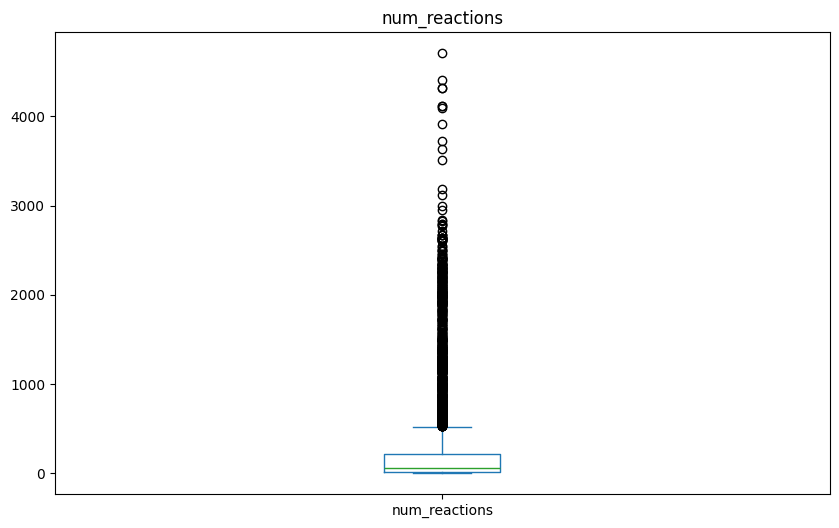

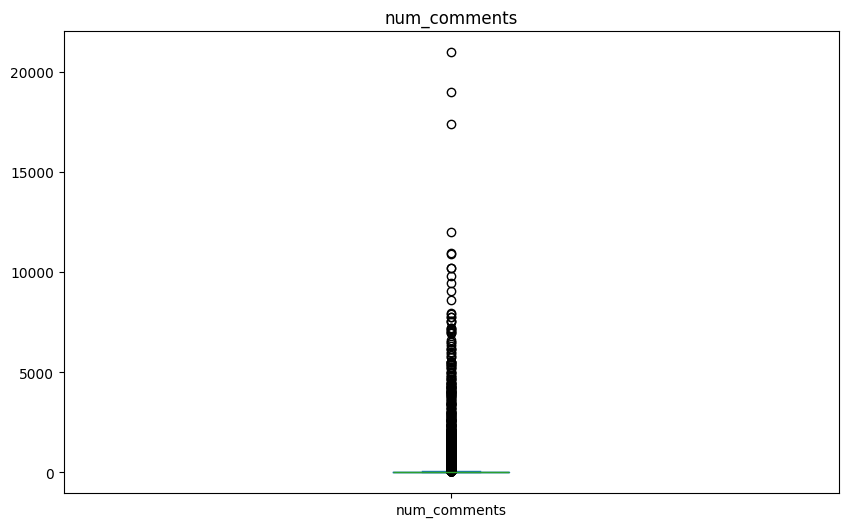

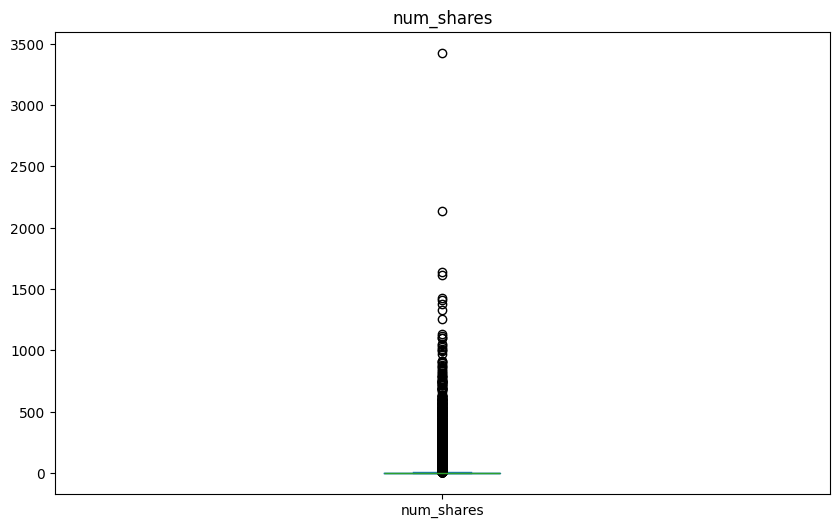

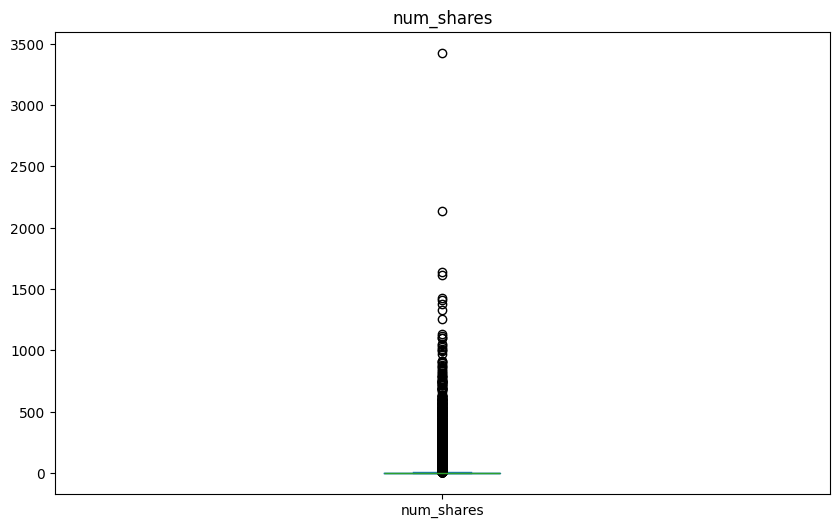

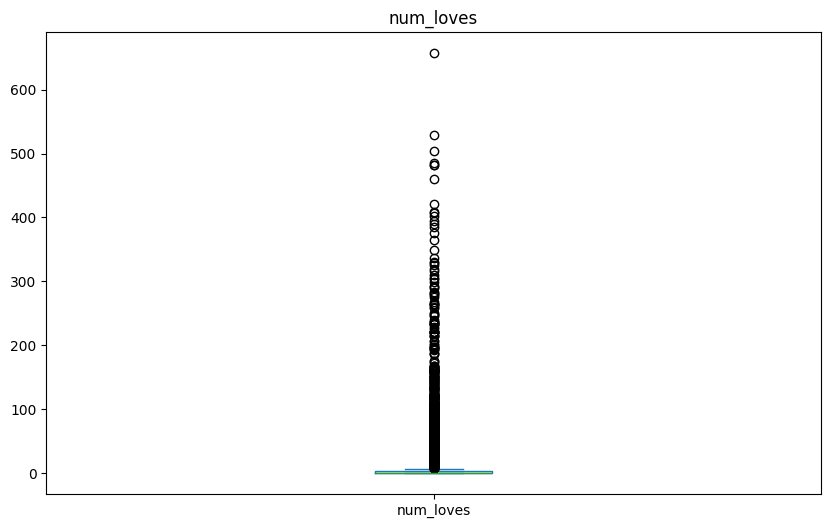

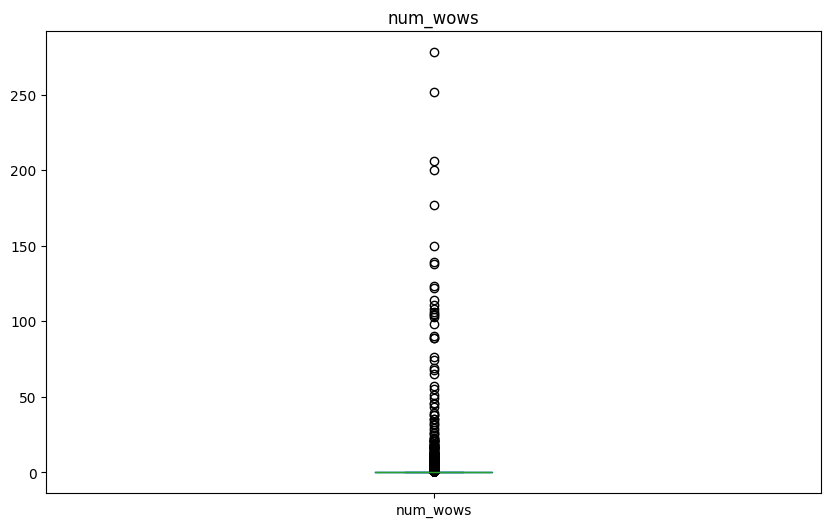

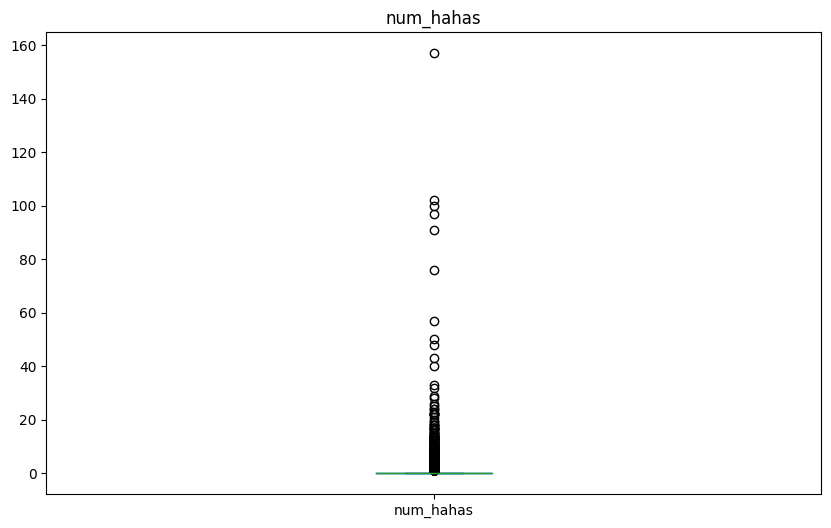

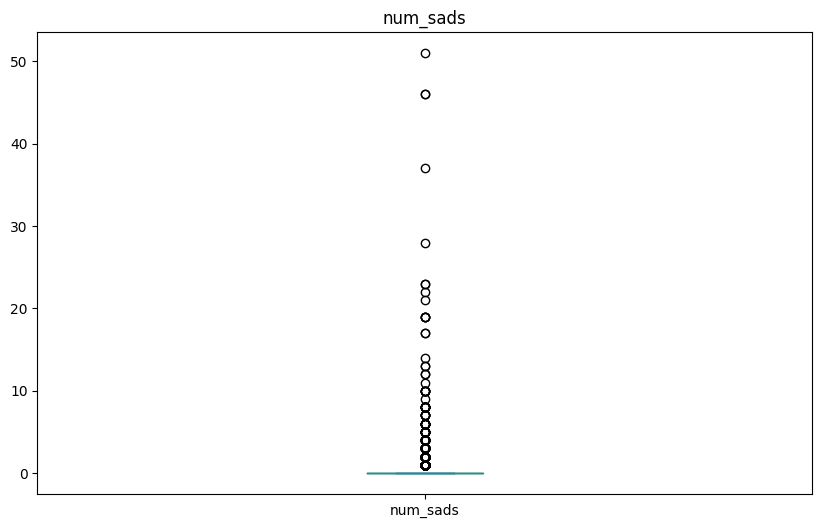

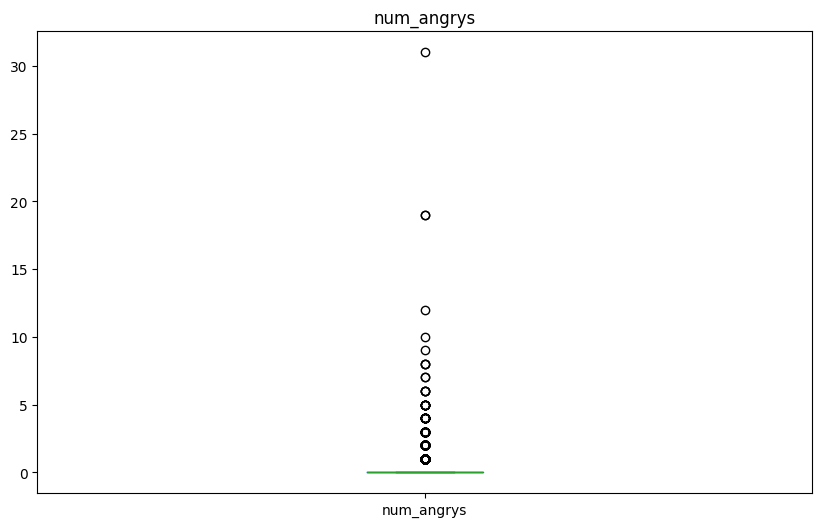

In [35]:
columns = [ "num_reactions","num_comments", "num_shares", "num_shares", "num_loves", "num_wows", "num_hahas","num_sads", "num_angrys"]
for i in columns:
    df[i].plot(kind='box', title=i, figsize=(10,6))
    plt.show()

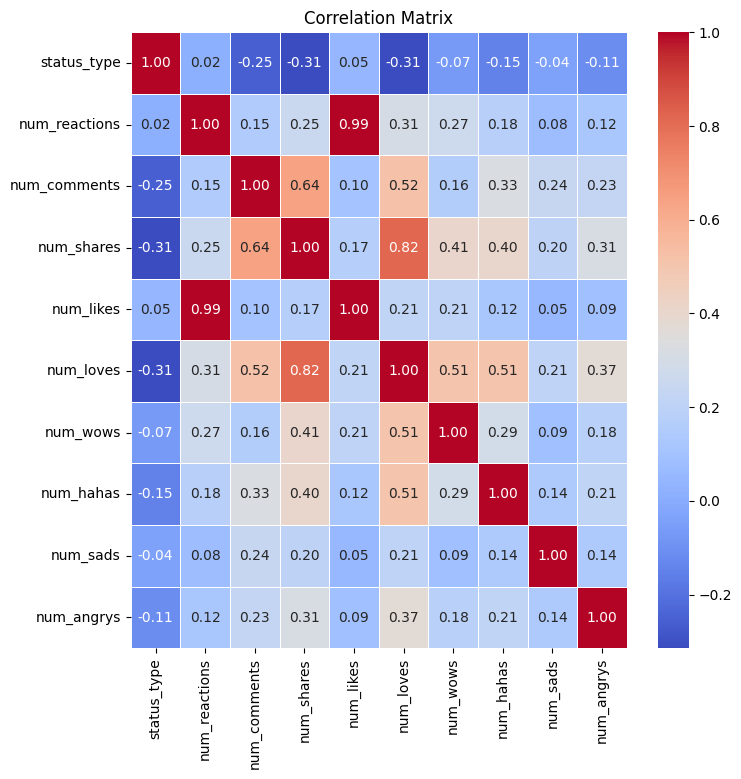

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


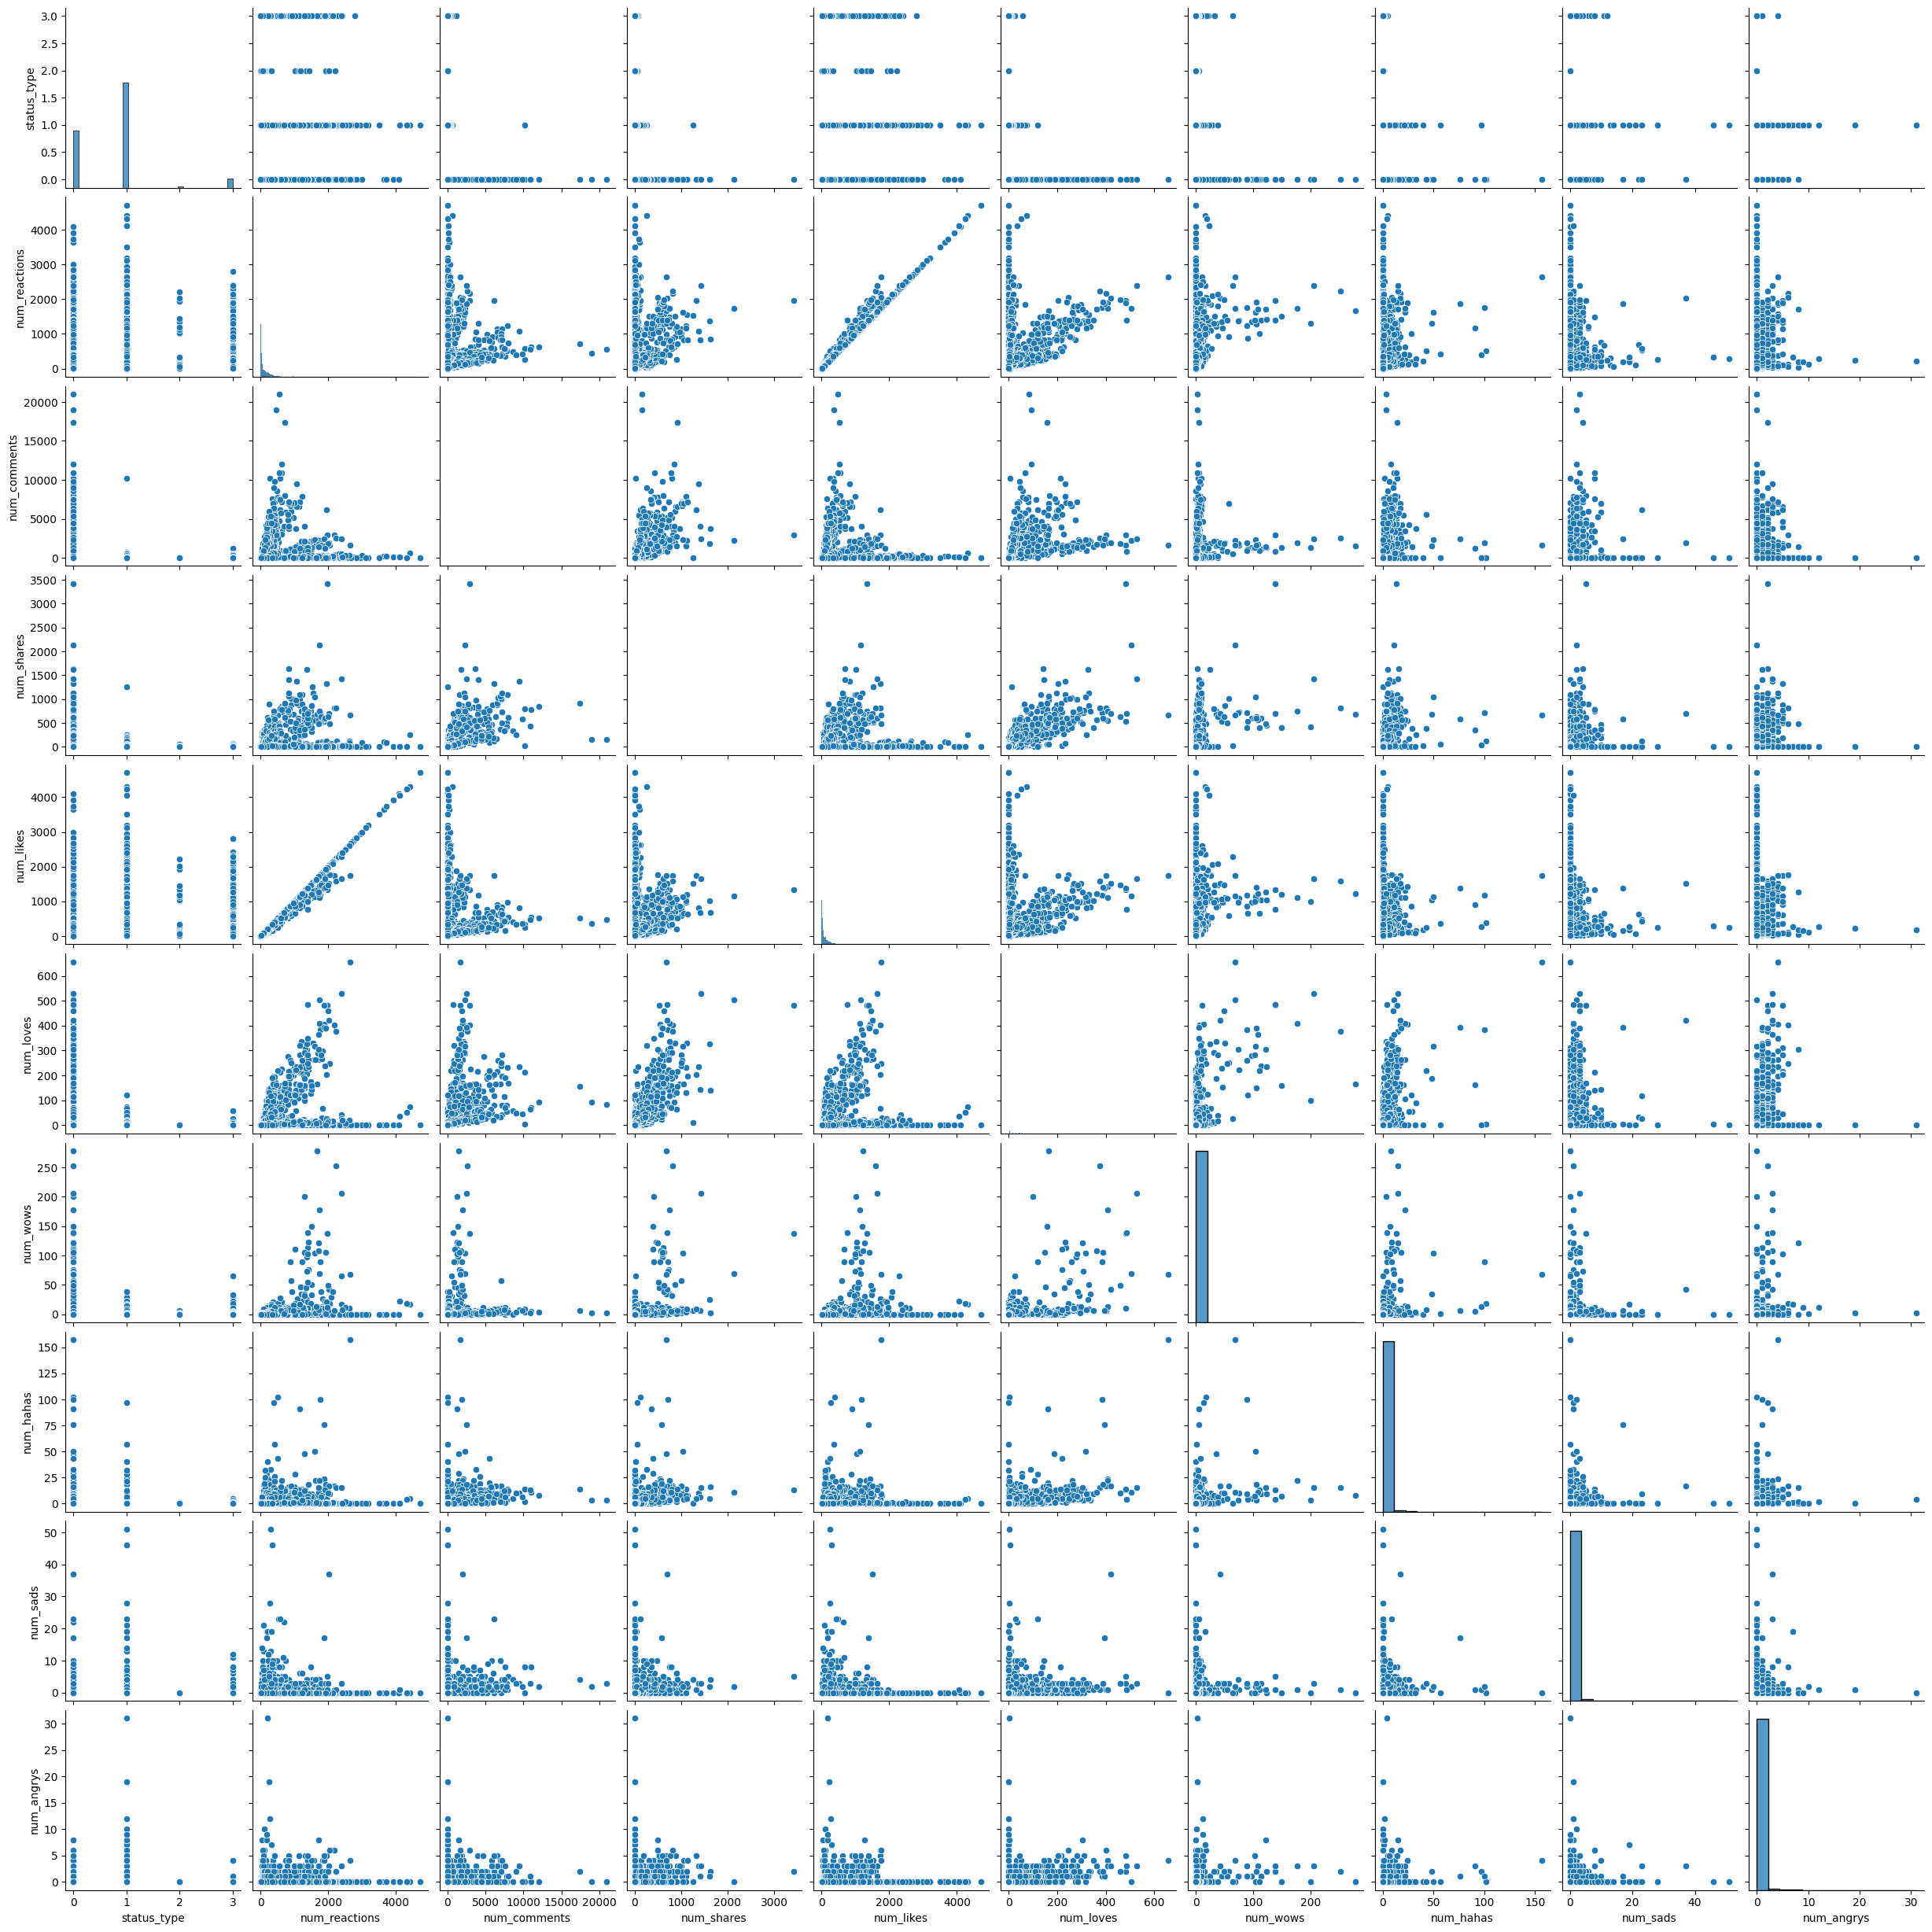

In [37]:
sns.pairplot(df)
plt.show()

In [38]:
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [39]:
pca = PCA(n_components = 3)
pca.fit(df)
df_PCA = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
df_PCA.describe().T 

,count,mean,std,min,25%,50%,75%,max
col1,7050.0,0.000000e+00,1.880184,-1.366115,-0.826826,-0.597409,-0.070572,28.900178
col2,7050.0,0.000000e+00,1.346460,-5.931991,-0.478207,-0.274213,0.021592,12.648947
col3,7050.0,-4.031448e-18,0.988361,-7.655342,-0.521527,0.023746,0.027821,27.406164


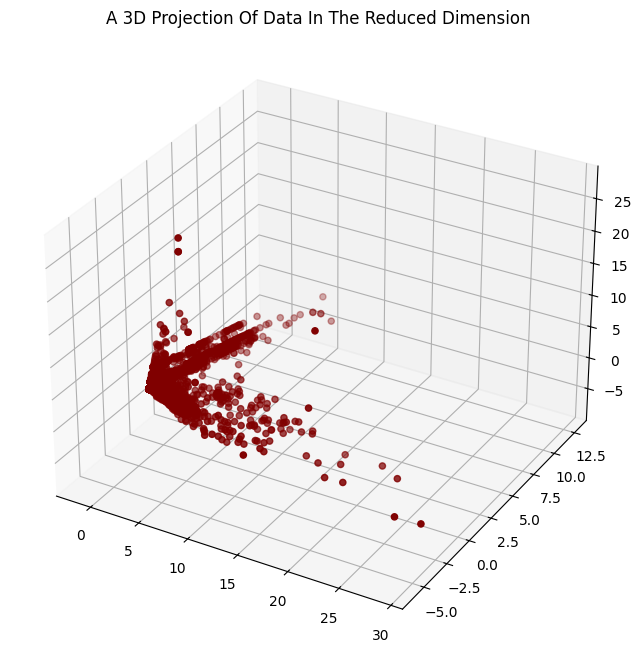

In [40]:
x =df_PCA["col1"]
y =df_PCA["col2"]
z =df_PCA["col3"]


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

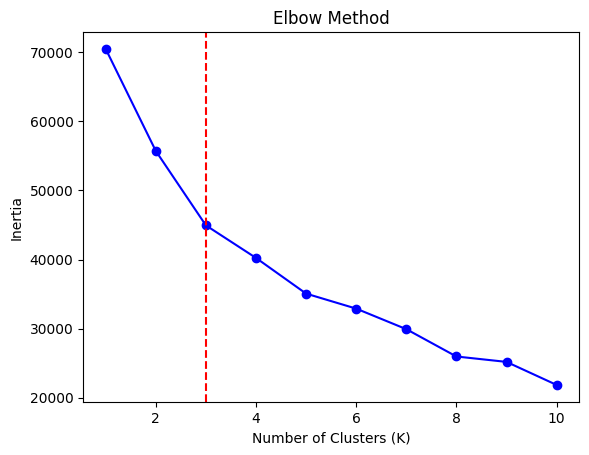

The optimal number of clusters is: 3


In [41]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11) 

for K in K_range:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)


kneedle = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.axvline(kneedle.elbow, color='red', linestyle='--')
plt.show()

print(f"The optimal number of clusters is: {kneedle.elbow}")

In [42]:
#agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering

 
AC = AgglomerativeClustering(n_clusters=4)


yhat_AC = AC.fit_predict(df_PCA)
df_PCA["Clusters"] = yhat_AC


df["Clusters"]= yhat_AC

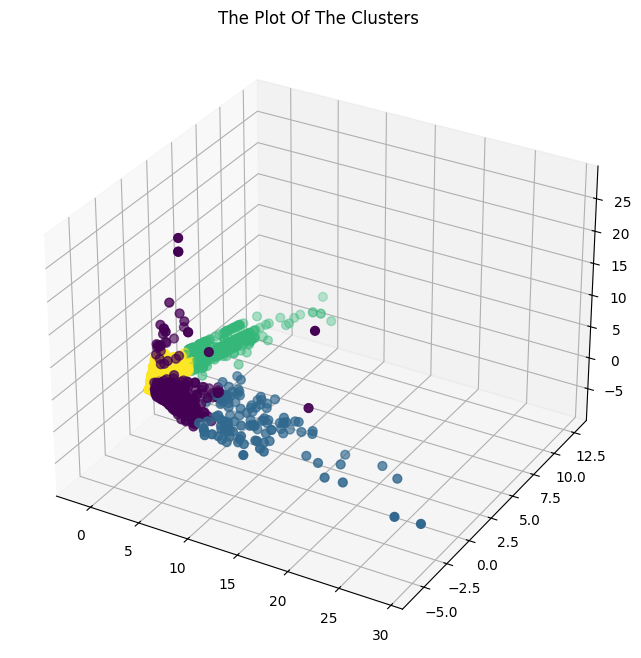

In [43]:
from matplotlib.colors import ListedColormap
from sklearn import metrics

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_PCA["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

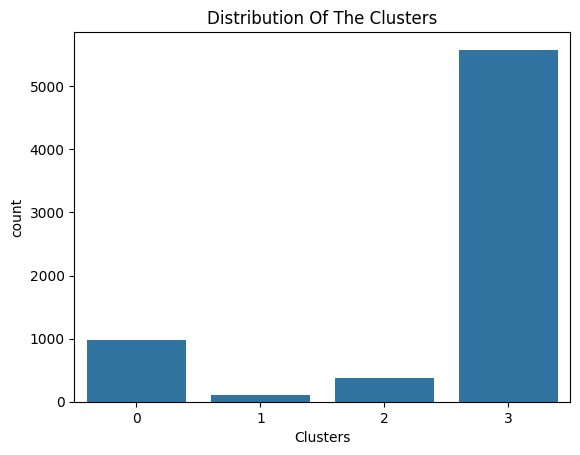

In [44]:

pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

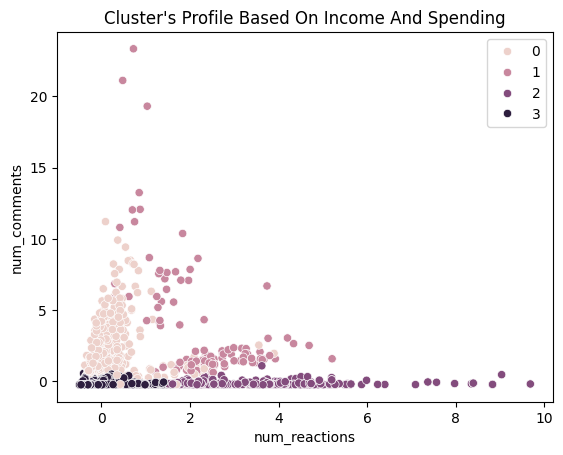

In [45]:
pl = sns.scatterplot(data = df,x=df["num_reactions"], y=df["num_comments"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

<h2>DBSCAN</h2>

In [ ]:
from sklearn.cluster import DBSCAN
import plotly.express as px
cluster = DBSCAN(eps=0.5, min_samples=5)
cluster.fit(df_PCA)

cluster.labels_[:10]

unique_labels = set(cluster.labels_)
print("Liczba klastrów: ", len(unique_labels) - (1 if -1 in cluster.labels_ else 0))






In [58]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming df_scaled is your scaled dataset
db = DBSCAN(eps=0.5, min_samples=5)
db.fit(df_PCA)

# Getting the cluster labels
labels = db.labels_

# Adding the labels to the DataFrame
df_PCA["Cluster"] = labels


unique_labels = set(cluster.labels_)
print("Liczba klastrów: ", len(unique_labels) - (1 if -1 in cluster.labels_ else 0))

Liczba klastrów:  9


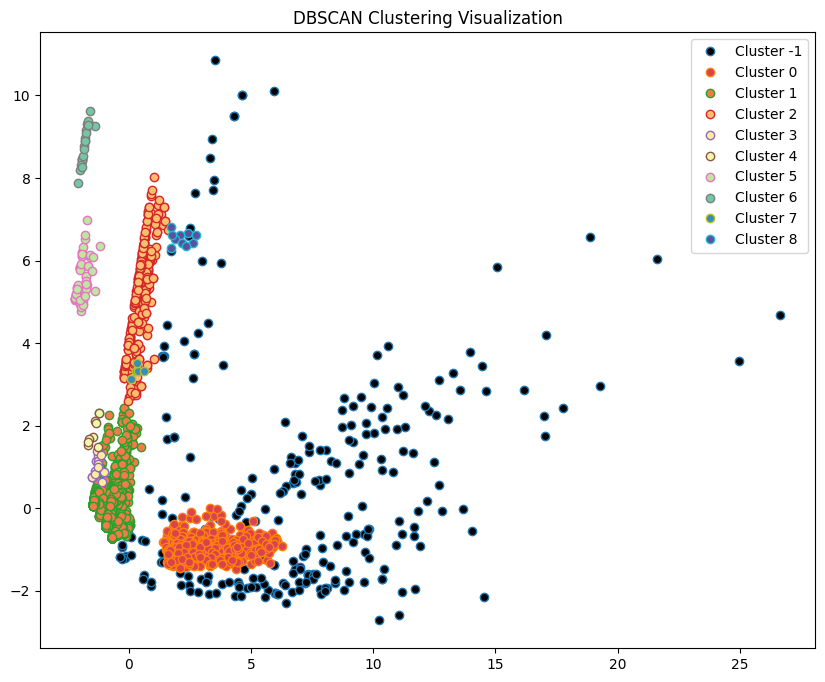

In [57]:
pca = PCA(n_components=2)  # Reducing to 2D
df_pca = pca.fit_transform(df_PCA)

# Plotting the result with labels as clusters
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 8))

for label, col in zip(unique_labels, colors):
    if label == -1:  # Noise points (DBSCAN labels noise as -1)
        col = [0, 0, 0, 1]  # Color noise points black

    # Plot points that correspond to the current cluster label
    class_member_mask = (labels == label)
    xy = df_pca[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6, label=f'Cluster {label}')

plt.title('DBSCAN Clustering Visualization')
plt.legend()
plt.show()
